In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train.csv")
train = train.drop(["nonclk"],axis=1)

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [4]:
train.head()

,user,time_stamp,adgroup_id,pid,clk
0,286630,1494218579,13,430539_1007,0
1,286630,1494289247,13,430539_1007,0
2,26279,1494478631,38,430539_1007,0
3,683451,1494229042,85,430539_1007,0
4,738208,1494198871,102,430548_1007,0


In [5]:
ad_feature.describe()

,adgroup_id,cate_id,campaign_id,customer,brand,price
count,846811.000000,846811.000000,846811.000000,846811.000000,600481.000000,8.468110e+05
mean,423406.000000,5868.593464,206552.604280,113180.406006,229254.422596,1.838867e+03
std,244453.423738,2705.171203,125192.340908,73435.834950,132288.849633,3.108877e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e-02
25%,211703.500000,4383.000000,97583.000000,47960.000000,110616.000000,4.900000e+01
50%,423406.000000,6183.000000,200780.000000,107278.000000,234423.000000,1.390000e+02
75%,635108.500000,7047.000000,314565.500000,172013.500000,344818.000000,3.520000e+02
max,846811.000000,12960.000000,423436.000000,255875.000000,461497.000000,1.000000e+08


In [6]:
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test.csv")

### Merge all information into train set

In [7]:
train = train.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [8]:
train = train.join(user_profile.set_index("userid"),on="user")

In [9]:
train.head()

,user,time_stamp,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,286630,1494218579,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
1,286630,1494289247,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
2,26279,1494478631,38,430539_1007,0,4535,394495,5122,387739.0,1800.0,0,9,1,3,NaN,3,0,2.0
3,683451,1494229042,85,430539_1007,0,6873,398858,53487,443907.0,720.0,0,11,1,5,NaN,3,0,4.0
4,738208,1494198871,102,430548_1007,0,126,138148,20107,102457.0,98.0,34,4,2,4,2.0,3,0,4.0


### Add weekday, hour and weekend fields

In [10]:
train["unix"]=pd.to_datetime(train.time_stamp,unit="s")
train["weekday"]=train.unix.dt.weekday
train["hour"]=train.unix.dt.hour
train["weekend"] = train.weekday >= 5

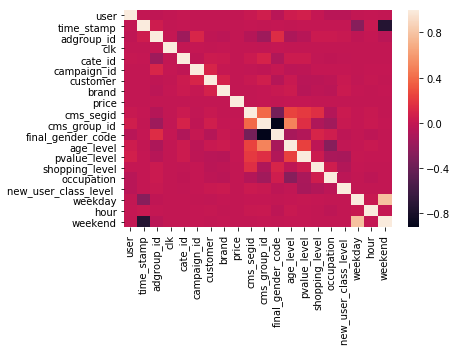

In [11]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Analysis Behavior Log

In [12]:
behavior_log.head()

,user,time_stamp,btag,cate,brand
0,308688,1493820198,pv,6408,258638
1,591909,1493814087,pv,5744,321326
2,876901,1493797178,pv,7621,104107
3,876901,1493797679,pv,7621,104107
4,57178,1493744427,pv,7205,167727


In [13]:
s = behavior_log.sample(n=1)
s

,user,time_stamp,btag,cate,brand
36595288,619902,1493896608,pv,6427,15419


In [14]:
pd.to_datetime(s.time_stamp, unit="s").dt.hour

36595288    11
Name: time_stamp, dtype: int64

In [15]:
behavior_log["unix"]=pd.to_datetime(behavior_log.time_stamp,unit="s")
behavior_log["weekday"]=behavior_log.unix.dt.weekday
behavior_log["hour"]=behavior_log.unix.dt.hour
behavior_log["weekend"] = behavior_log.weekday >= 5

In [16]:
behavior_log.describe()

,user,time_stamp,cate,brand,weekday,hour
count,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07
mean,5.768753e+05,1.493774e+09,5.704339e+03,2.125735e+05,3.060469e+00,9.484853e+00
std,3.278639e+05,6.313171e+06,2.522228e+03,1.330231e+05,2.007559e+00,5.706902e+00
min,1.000000e+01,-2.101140e+09,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.923620e+05,1.493303e+09,4.314000e+03,9.401200e+04,1.000000e+00,5.000000e+00
50%,5.795260e+05,1.493816e+09,6.183000e+03,2.046970e+05,3.000000e+00,9.000000e+00
75%,8.566440e+05,1.494256e+09,6.508000e+03,3.262820e+05,5.000000e+00,1.400000e+01
max,1.141723e+06,1.727021e+09,1.297600e+04,4.615270e+05,6.000000e+00,2.300000e+01


In [17]:
behavior_log.shape

(64795089, 9)

In [18]:
behavior_log.head()

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False


In [164]:
behavior_groups = behavior_log.groupby(["user"]).size()

In [165]:
behavior_log

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False
5,738740,1493802165,pv,5464,264936,2017-05-03 09:02:45,2,9,False
6,1111848,1493747053,pv,6208,454006,2017-05-02 17:44:13,1,17,False
7,628854,1493781424,buy,4262,370203,2017-05-03 03:17:04,2,3,False
8,785643,1493822932,pv,6412,96483,2017-05-03 14:48:52,2,14,False
9,785643,1493822950,pv,6412,96483,2017-05-03 14:49:10,2,14,False


## Calculate total number of actions per user and per action type 

In [19]:
behavior_groups = behavior_log.groupby(["user","btag"]).size().unstack()
behavior_groups["total_actions"] = behavior_groups.sum(1) #rowsum
behavior_groups = behavior_groups.fillna(0)

In [20]:
behavior_groups.head()

btag,buy,cart,fav,pv,total_actions
user,,,,,
10,2.0,0.0,1.0,73.0,76.0
21,2.0,2.0,0.0,78.0,82.0
22,0.0,0.0,0.0,1.0,1.0
37,10.0,5.0,37.0,1255.0,1307.0
68,12.0,1.0,4.0,259.0,276.0


In [21]:
train = train.join(behavior_groups,on="user")

## Calculate number of actions in category

In [56]:
train.loc[0]

user                                  286630
time_stamp                        1494218579
adgroup_id                                13
pid                                        0
clk                                        0
cate_id                                 7211
campaign_id                           130458
customer                                6395
brand                                 112840
price                                    289
cms_segid                                 17
cms_group_id                               3
final_gender_code                          2
age_level                                  3
pvalue_level                               1
shopping_level                             3
occupation                                 0
new_user_class_level                       4
unix                     2017-05-08 04:42:59
weekday                                    0
hour                                       4
weekend                                False
buy       

In [176]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0


#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = train.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    start_time = start_time or timeit.default_timer()
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)   

('Done with row 535560 of 535560, 1e+02%. Runtime: 0:30:54.233630, exp. remaining: 0:00:00 ',)

Wall time: 30min 54s


In [178]:
user_category_groups.head()

,user,cate_id,count,pv_cate,cart_cate,fav_cate,buy_cate,total_cate
0,10,770,1,1.0,0.0,0.0,0.0,1.0
1,10,6244,1,4.0,0.0,0.0,0.0,4.0
2,10,6261,1,9.0,0.0,0.0,0.0,9.0
3,21,4360,3,14.0,1.0,0.0,0.0,15.0
4,22,4436,1,0.0,0.0,0.0,0.0,0.0


In [188]:
train.tail().columns

Index(['user', 'time_stamp', 'adgroup_id', 'pid', 'clk', 'cate_id',
       'campaign_id', 'customer', 'brand', 'price', 'cms_segid',
       'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level ', 'unix',
       'weekday', 'hour', 'weekend', 'buy', 'cart', 'fav', 'pv',
       'total_actions', 'pv_cate', 'cart_cate', 'fav_cate', 'buy_cate',
       'total_cate'],
      dtype='object')

In [194]:
train = train.drop(['total_cate'],axis=1)

In [198]:
train = pd.merge(train,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [156]:
#users in test that are not in behavior log
len(set(test.user.unique())-set(behavior_log.user.unique()))

32

In [158]:
#users in test that are not in train
len(set(test.user.unique())-set(train.user.unique()))

3215

In [166]:
#users in train that are not in behavior_log
len(set(train.user.unique())-set(behavior_log.user.unique()))

271

In [169]:
behavior_log.shape

(64795089, 9)

In [172]:
%%timeit
behavior_log.drop_duplicates(["user","time_stamp"]).shape

(59565105, 9)

In [203]:
train.to_csv("train_extended.csv",index=False)

# Simple prediction

In [24]:
#merge test
test = test.join(user_profile.set_index("userid"),on="user")
test = test.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")
test = test.join(behavior_groups,on="user")

In [25]:
#add time
test["unix"]=pd.to_datetime(test.time_stamp,unit="s")
test["weekday"]=test.unix.dt.weekday
test["hour"]=test.unix.dt.hour
test["weekend"] = test.weekday >= 5

In [200]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0


#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = test.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    start_time = start_time or timeit.default_timer()
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)
    
#merge into testset
test = pd.merge(test,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

('Done with row 40106 of 40106, 100.0%. Runtime: 0:14:05.148979, exp. remaining: 0:00:00 ',)

Wall time: 14min 5s


In [202]:
test.to_csv("test_extended.csv",index=False)

In [204]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train.pid)
train.pid = le.transform(train.pid)
test.pid = le.transform(test.pid)

In [205]:
# sample train set so that ratio of 0 and 1 matches test set (21.559% 1s)
target_size = test.shape[0]
ratio = 0.21559
numberOnes = round(ratio*target_size)
ones = train[train.clk == 1].sample(n=numberOnes)
zeros = train[train.clk == 0].sample(n=target_size-numberOnes)
train_set = pd.concat([ones,zeros])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn import svm
#gnb = lgb.LGBMClassifier()
#gnb = svm.SVC()
gnb = RandomForestClassifier()
drop = ["brand","unix"]
train_set = train.drop(drop,axis=1)
test= test.fillna(-1)
test_set = test.drop(drop,axis=1)
train_set = train_set.drop(["clk"],axis=1)
train_set = train_set.fillna(-1)

In [214]:
train_set.columns

Index(['user', 'time_stamp', 'adgroup_id', 'pid', 'cate_id', 'campaign_id',
       'customer', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level ', 'weekday', 'hour', 'weekend', 'buy', 'cart',
       'fav', 'pv', 'total_actions', 'count', 'pv_cate', 'cart_cate',
       'fav_cate', 'buy_cate', 'total_cate'],
      dtype='object')

In [215]:
set(train_set.columns).symmetric_difference(test_set.columns)

{'id'}

In [ ]:
model = gnb.fit(train_set,train.clk)
pred = model.predict(test_set.drop(["id"],axis=1))

In [ ]:
submission = pd.DataFrame({"id":test.id,"clk":pred})
submission.to_csv("NaiveBayesPrediction.csv",index=False)

In [ ]:
submission.describe()

## Archive